In [4]:
#Load some packages to be used in this program
import matplotlib as plt
import scipy  as sp
import numpy  as np
import xarray as xr
import pyart  as pyart
import os
import glob
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
%pylab inline
import cartopy.io.shapereader as shpreader
import netCDF4  as netCDF4
import pytz


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/home/sransom/pyart/pyart/graph/cm.py:104: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:
/home/sransom/pyart/pyart/graph/cm_colorblind.py:32: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:


Populating the interactive namespace from numpy and matplotlib


/home/sransom/.conda/envs/clouds_env/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [118]:
from matplotlib.animation import FuncAnimation
#import matplotlib.animation as animation

In [2]:
#load sample data file for instructive usage
radar = pyart.io.read('/nfs/gce/projects/digr/xsapr_nsa/BRW190120002403.RAWTA32.maint')
rlon = -radar.longitude['data'][0]
rlat = radar.latitude['data'][0]

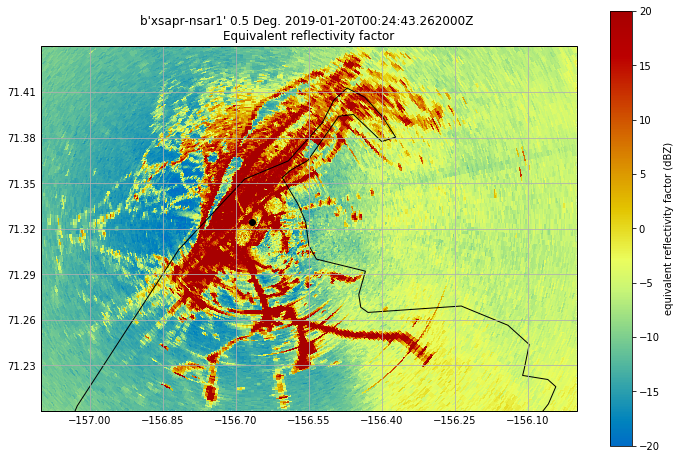

In [17]:
display    = pyart.graph.RadarMapDisplay(radar)
projection = ccrs.Mercator()#(central_latitude =radar.latitude ['data'][0],
                                   #central_longitude=radar.longitude['data'][0] )
fig        = plt.figure(figsize = (12,8))


# Plot data for one day
display.plot_ppi_map('total_power', 1, 
                     vmin = -20,
                     vmax =  20,
                     min_lon = -157.1, max_lon = -156,
                     min_lat =   71.2, max_lat =   71.44,
                     lon_lines = np.arange(-157.15,-155.95,.15),
                     lat_lines = np.arange(71.17, 71.47, .03),
                     resolution = '10m',
                     projection = projection,
                     # Add lines of lat and lon
                     lat_0=radar.latitude ['data'][0],
                     lon_0=radar.longitude['data'][0]
                    )
# Add point demarkating location of xsapr  site
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0], color = 'k')

plt.show()

/nfs/gce/projects/digr/xsapr_nsa/BRW190120000004.RAWTA30.maint
/nfs/gce/projects/digr/xsapr_nsa/BRW190120001204.RAWTA31.maint
/nfs/gce/projects/digr/xsapr_nsa/BRW190120002403.RAWTA32.maint
/nfs/gce/projects/digr/xsapr_nsa/BRW190120003603.RAWTA33.maint
/nfs/gce/projects/digr/xsapr_nsa/BRW190120004803.RAWTA34.maint
/nfs/gce/projects/digr/xsapr_nsa/BRW190120010003.RAWTA35.maint
/nfs/gce/projects/digr/xsapr_nsa/BRW190120011203.RAWTA36.maint
/nfs/gce/projects/digr/xsapr_nsa/BRW190120012404.RAWTA37.maint

In [3]:
# Read all files of
jan_20_evening = glob.glob('/nfs/gce/projects/digr/xsapr_nsa/BRW1901202*')
jan_20_evening.sort()
len(jan_20_evening)

20

In [122]:
#creating a radar animation using pyart and matplotlib functions

def animate(nframe):
    files = glob.glob('/nfs/gce/projects/digr/xsapr_nsa/BRW1901202*')
    files.sort()
    plt.clf()
    nfile = files[nframe]
    radar = pyart.io.read(nfile)
    display = pyart.graph.RadarMapDisplay(radar)
    projection = ccrs.Mercator()
    # Delete radar after use to save memory.
    #del radar
    display.plot_ppi_map('reflectivity', 1, 
                     vmin = -20,
                     vmax =  20,
                     min_lon = -157.1, max_lon = -156,
                     min_lat =   71.2, max_lat =   71.44,
                     lon_lines = np.arange(-157.15,-155.95,.15),
                     lat_lines = np.arange(71.17, 71.47, .03),
                     resolution = '10m',
                     projection = projection,
                     lat_0=radar.latitude ['data'][0],
                     lon_0=radar.longitude['data'][0])
    del radar

    #display.plot_point(-87.981810, 41.713969 , label_text='ANL', symbol='ko')
fig = plt.figure(figsize=(12, 8))

anim_klot = FuncAnimation(fig, animate, frames=len(jan_20_evening))
anim_klot.save('/home/sransom/pyth/reproducedGraphic.gif', writer = 'imagemagick', fps=2)
#plt.show()
plt.close()

In [3]:
#make a nice time stamp
pacific = pytz.timezone('US/Alaska')
index_at_start = radar.sweep_start_ray_index['data'][0]
time_at_start_of_radar = pyart.io.cfradial.netCDF4.num2date(radar.time['data'][index_at_start])
local_time = pacific.fromutc(time_at_start_of_radar)
fancy_date_string = local_time.strftime('%A %B %d at %I:%M %p %Z')
print(fancy_date_string)

#Give it a nice title
title = 'X-SAPR Utqiagvik \n' + fancy_date_string

NameError: name 'pytz' is not defined

In [123]:
#creating a more general radar animation using pyart and matplotlib functions

def animate(nframe, propiedad, minv, maxv):
    files = glob.glob('/nfs/gce/projects/digr/xsapr_nsa/BRW1901202*')
    files.sort()
    plt.clf()
    nfile = files[nframe]
    radar = pyart.io.read(nfile)
    title = title
    if propiedad == 'total_power':
        gatefilter = pyart.filters.GateFilter(radar)
        gatefilter.exclude_above(propiedad, 40)
        gatefilter.exclude_below(propiedad, 10)
    elif propiedad == 'reflectivity':
        gatefilter = pyart.filters.GateFilter(radar)
        gatefilter.exclude_above(propiedad, 20)
        gatefilter.exclude_below(propiedad, 0)
    elif propiedad == 'differential_reflectivity':
        gatefilter = pyart.filters.GateFilter(radar)
        gatefilter.exclude_above(propiedad, 1.5)
        gatefilter.exclude_below(propiedad, 0)
    else:
        gatefilter = None
    display = pyart.graph.RadarMapDisplay(radar)
    projection = ccrs.Mercator()
    display.plot_ppi_map(propiedad, 1, 
                     vmin = minv,
                     vmax = maxv,
    
                     resolution = '10m',
                     projection = projection,
                     gatefilter = gatefilter,
                     lat_0=radar.latitude ['data'][0],
                     lon_0=radar.longitude['data'][0])
    display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0], color = 'k', label_text = 'X-sapr source')
    del radar

    #display.plot_point(-87.981810, 41.713969 , label_text='ANL', symbol='ko')
#fig = plt.figure(figsize=(12, 8))
#
#anim_klot = FuncAnimation(fig, animate, fargs = ('reflectivity',), frames=len(jan_20_evening))
#anim_klot.save('/home/sransom/pyth/EG_Utqiagvik_reflect.gif', writer = 'imagemagick', fps=2)
##plt.show()
#plt.close()

In [124]:
# files = glob.glob('/nfs/gce/projects/digr/xsapr_nsa/BRW1901202*')

In [196]:
radar.range['data']

array([     0.,    100.,    200., ...,  99800.,  99900., 100000.],
      dtype=float32)

In [125]:
# Now that we have a gif of reflectivity, consider some other properties, and plot them as well

vmin_ = (-30, -30, -15,  0, -1, -1, 0, 0, -10)
vmax_ = ( 50,  30,  15,  5,  8,  1, 1, 1, 160)

propnum = 0
for propiedad in radar.fields.keys():
    fig = plt.figure(figsize=(12, 8))
    vmin = vmin_[propnum]
    vmax = vmax_[propnum]
    propnum = propnum + 1
    anim_klot = FuncAnimation(fig, animate, fargs = (propiedad, vmin, vmax), frames=len(jan_20_evening))
    anim_klot.save('/home/sransom/pyth/EG_Utqiagvik_' + propiedad +'.gif', writer = 'imagemagick', fps=2)
    print('fig ' + str(propnum) + ' printed')
    #plt.show()
    plt.close()


fig 1 printed
fig 2 printed
fig 3 printed
fig 4 printed
fig 5 printed
fig 6 printed
fig 7 printed
fig 8 printed
fig 9 printed


Next we will grid the data:

In [ ]:
files.sort()
files

In [ ]:
anim_klot = FuncAnimation(fig, animate, fargs = ('total_power', vmin, vmax,), frames=len(jan_20_evening))
    anim_klot.save('/home/sransom/pyth/gatefilter_eg.gif', writer = 'imagemagick', fps=2)
    #plt.show()
    plt.close()

In [ ]:
# Create gate filter that isolates velocities characteristic of sea ice

gatefilter = pyart.filters.GateFilter(radar)
gatefilter.exclude_above('total_power', 40)
gatefilter.exclude_below('total_power', 20)
